# Python Project - Prosper Loan Dataset
## by Olorunnisola Adedamola Ismail

## Introduction
  The Prosper Loan dataset is a collection of data from the Prosper online lending platform. It contains information about loans, borrowers, and various financial and demographic variables. This dataset offers valuable insights into loan patterns, credit risk assessment, borrower behavior, and the alternative lending market. It is a valuable resource for researchers, analysts, and data scientists interested in studying the dynamics of peer-to-peer lending.

# Preliminary Wrangling

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
  df =  pd.read_csv('loan.csv')

In [70]:
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,13/08/2013 00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [72]:
df.shape

(113937, 81)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?
The Prosper Loan dataset consists of 113,937 rows and 81 columns. The dataset contains a variety of data types, including 3 boolean (bool) columns, 49 floating-point (float64) columns, 12 integer (int64) columns, and 17 object columns. The dataset occupies a memory usage of approximately 68.1+ MB.
he dataset's structure suggests a comprehensive collection of loan-related information, including borrower characteristics, loan attributes, and various financial and demographic variables. The boolean columns likely represent binary indicators or flags related to specific loan features. The floating-point columns may include continuous numerical variables such as loan amounts or interest rates. The integer columns could represent discrete numerical values, such as counts or identifiers. Finally, the object columns may include textual data such as borrower names, loan descriptions, or categorical variables.

### What is/are the main feature(s) of interest in your dataset?
main features of interest in the Prosper Loan dataset are:
1. Loan Status
2. Interest Rate
3. Loan Amount

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Main features include are:
1. Borrower Demographic
2. Loan Term
3. Employment History
4. Prosper Rating

## Univariate Exploration
The univariate analysis of the Prosper Loan dataset aims to gain insights into the demographics of the customers. Three key variables are considered for this analysis: 
 1. What are the different loan statuses present in the dataset?
 2. What are the different loan terms available in the dataset?
 3. What is the distribution of employment statuses among the borrowers?

In [74]:
df.columns = df.columns.str.lower()

In [75]:
df

,listingkey,listingnumber,listingcreationdate,creditgrade,term,loanstatus,closeddate,borrowerapr,borrowerrate,lenderyield,...,lp_servicefees,lp_collectionfees,lp_grossprincipalloss,lp_netprincipalloss,lp_nonprincipalrecoverypayments,percentfunded,recommendations,investmentfromfriendscount,investmentfromfriendsamount,investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,14/08/2009 00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,17/12/2009 00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,55:02.7,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,42:55.3,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,49:12.7,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,18:26.6,NaN,60,Completed,13/08/2013 00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   listingkey                           113937 non-null  object 
 1   listingnumber                        113937 non-null  int64  
 2   listingcreationdate                  113937 non-null  object 
 3   creditgrade                          28953 non-null   object 
 4   term                                 113937 non-null  int64  
 5   loanstatus                           113937 non-null  object 
 6   closeddate                           55089 non-null   object 
 7   borrowerapr                          113912 non-null  float64
 8   borrowerrate                         113937 non-null  float64
 9   lenderyield                          113937 non-null  float64
 10  estimatedeffectiveyield              84853 non-null   float64
 11  estimatedloss

# Question 1:What are the different loan statuses present in the dataset?

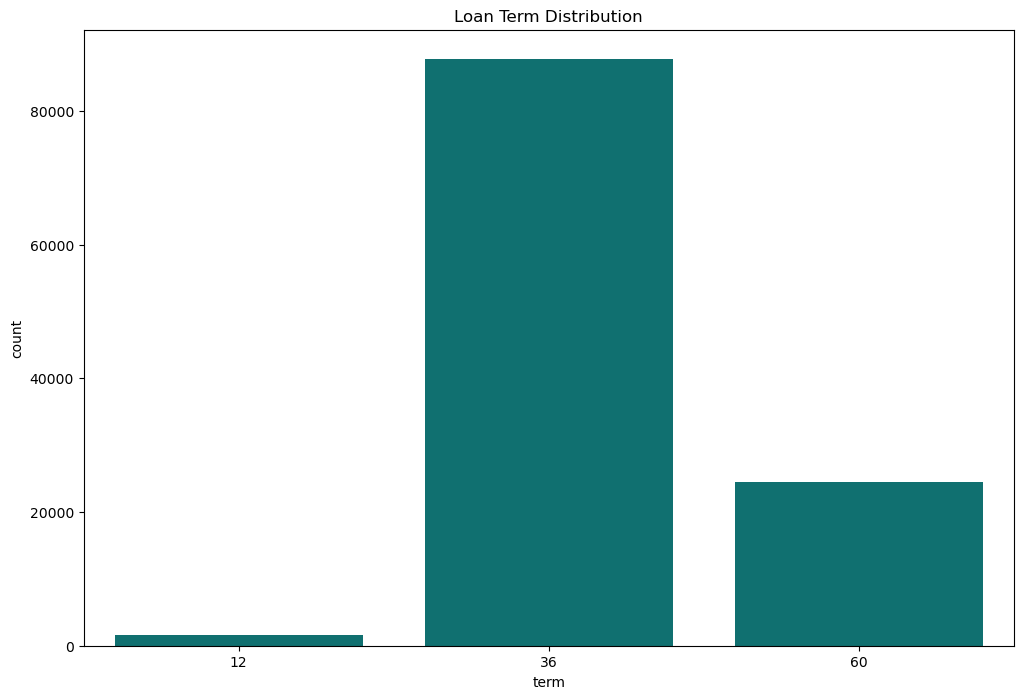

In [35]:
sns.countplot(data=df, x='term', color='teal');
plt.title('Loan Term Distribution');
fig = plt.gcf()
fig.set_size_inches(12, 8)

In [52]:
loan_status_counts = df['term'].value_counts()

In [53]:
loan_status_counts

36    87778
60    24545
12     1614
Name: term, dtype: int64

# In the dataset, there are three different loan statuses recorded: 36, 60, and 12. These values represent the term or duration of the loans. 

The loan status "36" corresponds to loans with a term of 36 months, and there are 87,778 instances of this loan term in the dataset. This indicates that a significant number of borrowers opted for a 36-month loan term.

Similarly, the loan status "60" corresponds to loans with a term of 60 months, and there are 24,545 instances of this loan term. This suggests that a substantial number of borrowers also chose a longer loan term of 60 months.

Lastly, the loan status "12" corresponds to loans with a term of 12 months, and there are 1,614 instances of this loan term. This indicates that a smaller proportion of borrowers opted for a shorter loan term of 12 months.

By examining the distribution of loan statuses or terms, we can gain insights into the preferences of borrowers in terms of loan durations. This information can be valuable for lenders and analysts to understand the popularity of different loan terms and potentially identify any trends or patterns related to loan performance or borrower behavior.

# Question 2:What are the different loan terms available in the dataset?

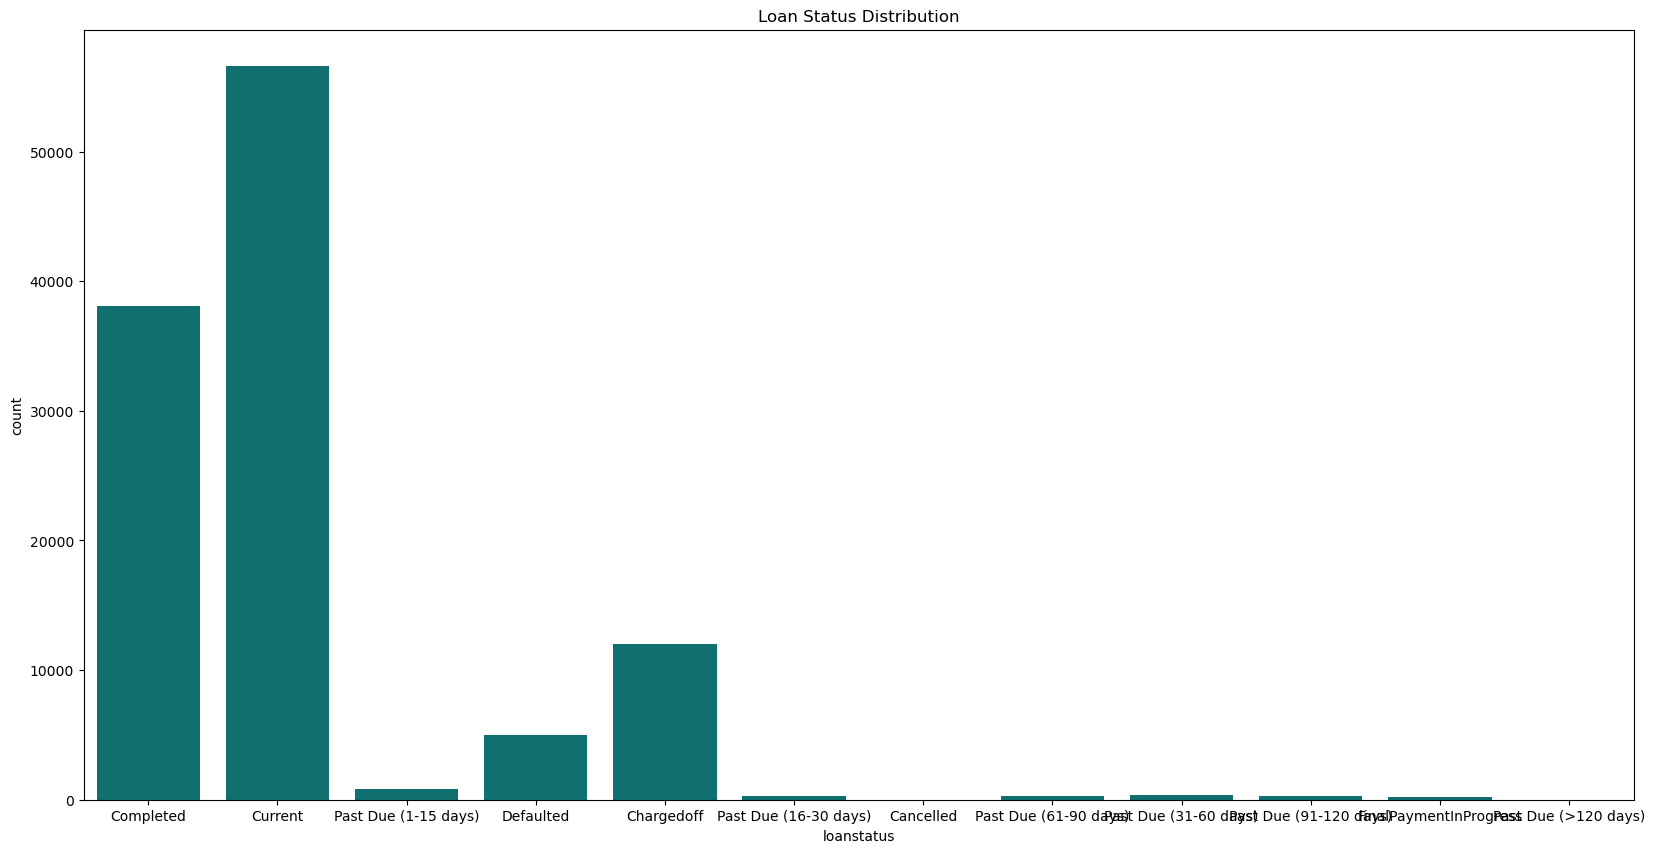

In [18]:
sns.countplot(data=df, x='loanstatus', color='teal');
plt.title('Loan Status Distribution')
fig = plt.gcf()
fig.set_size_inches(20, 10)

In [50]:
loan_status = df['loanstatus'].unique()


In [51]:
loan_status

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

# In the dataset, there are several different loan terms available, as indicated by the loan status values. The loan terms present in the dataset include:

1. Completed: This loan term signifies that the loan has been successfully paid off or completed by the borrower.

2. Current: Loans labeled as 'Current' are currently active and being repaid by the borrower according to the agreed-upon terms.

3. Past Due (1-15 days): This loan term represents loans that are overdue by 1 to 15 days, indicating that the borrower has not made the payment within the specified time frame.

4. Defaulted: Loans labeled as 'Defaulted' indicate that the borrower has failed to repay the loan according to the agreed-upon terms, resulting in default.

5. Chargedoff: 'Chargedoff' denotes loans that have been declared as uncollectible by the lender. It typically occurs after an extended period of delinquency.

6. Past Due (16-30 days): This loan term indicates loans that are overdue by 16 to 30 days, suggesting a delay in repayment by the borrower.

7. Cancelled: Loans labeled as 'Cancelled' represent loans that have been terminated or revoked before the borrower received the full loan amount.

8. Past Due (61-90 days): This loan term signifies loans that are overdue by 61 to 90 days, indicating a significant delay in repayment.

9. Past Due (31-60 days): This loan term represents loans that are overdue by 31 to 60 days, suggesting a moderate delay in repayment.

10. Past Due (91-120 days): Loans labeled as 'Past Due (91-120 days)' indicate loans that are overdue by 91 to 120 days, representing a substantial delay in repayment.

11. FinalPaymentInProgress: This loan term indicates that the borrower is in the process of making the final payment to complete the loan.

12. Past Due (>120 days): Loans labeled as 'Past Due (>120 days)' represent loans that are significantly overdue, with a delay of more than 120 days in repayment.

By understanding the different loan terms available in the dataset, lenders and analysts can gain insights into the loan statuses, repayment behavior, and potential risks associated with borrowers' payment patterns.

# Question 3:What is the distribution of employment statuses among the borrowers?

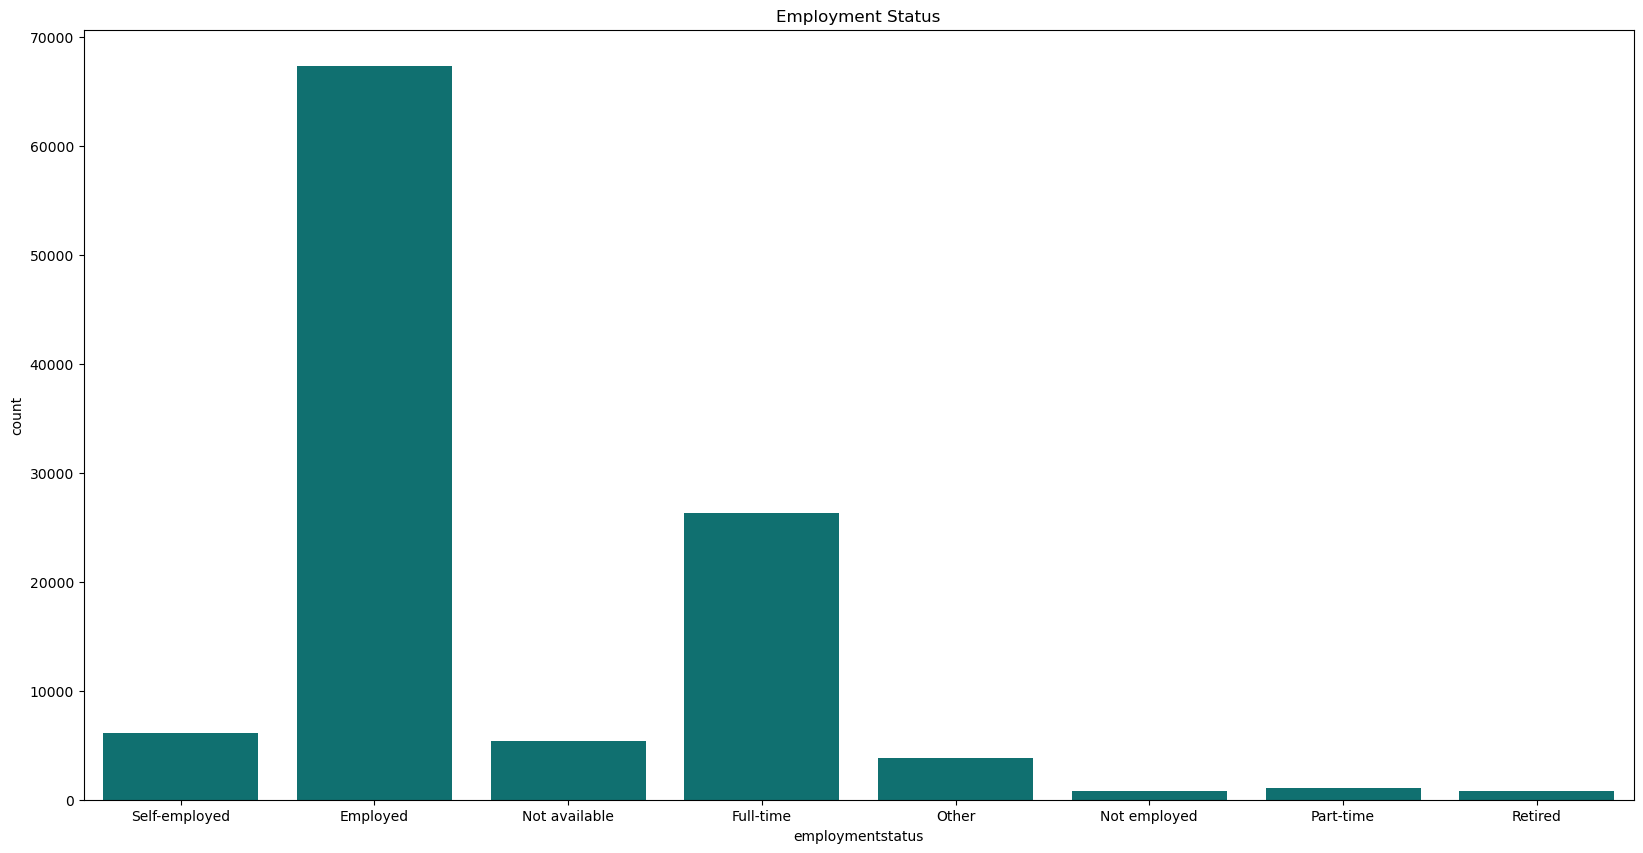

In [20]:
sns.countplot(data=df, x='employmentstatus', color='teal');
plt.title('Employment Status')
fig = plt.gcf()
fig.set_size_inches(20, 10)

In [47]:
Employment_status_distribution = df['employmentstatus'].value_counts()


In [48]:
Employment_status_distribution


Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: employmentstatus, dtype: int64

# The distribution of employment statuses among the borrowers in the Prosper Loan dataset reveals the different employment categories and the respective count of borrowers falling into each category. Here's a simple explanation of the distribution:

1. Employed: The most common employment status among the borrowers is 'Employed', with 67,322 borrowers falling into this category. This indicates that a significant portion of borrowers in the dataset are currently employed.

2. Full-time: The second most common employment status is 'Full-time', with 26,355 borrowers falling into this category. This suggests that a considerable number of borrowers are engaged in full-time employment.

3. Self-employed: The 'Self-employed' category includes 6,134 borrowers. This signifies that a notable proportion of borrowers are running their own businesses or working as independent contractors.

4. Not available: There are 5,347 borrowers whose employment status is labeled as 'Not available'. This category indicates that the employment status information is missing or not provided for these borrowers in the dataset.

5. Other: The 'Other' category encompasses 3,806 borrowers with diverse or unspecified employment statuses that do not fit into the other defined categories.

6. Part-time: The 'Part-time' category consists of 1,088 borrowers who are employed on a part-time basis.

7. Not employed: There are 835 borrowers who are classified as 'Not employed', suggesting that they are currently without employment.

8. Retired: The 'Retired' category includes 795 borrowers who have formally retired from their professional careers.

By analyzing the distribution of employment statuses, lenders and analysts can gain insights into the employment composition of the borrower population. This information can be valuable for assessing the risk profile of borrowers and understanding the relationship between employment status and loan outcomes.

# Bivariate exploration
In bivariate exploration of the Prosper Loan dataset, where we analyze the relationship between two features, we can consider the following variables for analysis:
1. How does the loan status differ between different loan terms (e.g., 36 months, 60 months, 12 months)?
2. Does the loan status vary based on different employment statuses (e.g., employed, full-time, self-employed)?
3. Are there variations in loan terms across different employment statuses?

# Question 1:How does the loan status differ between different loan terms (e.g., 36 months, 60 months, 12 months)?

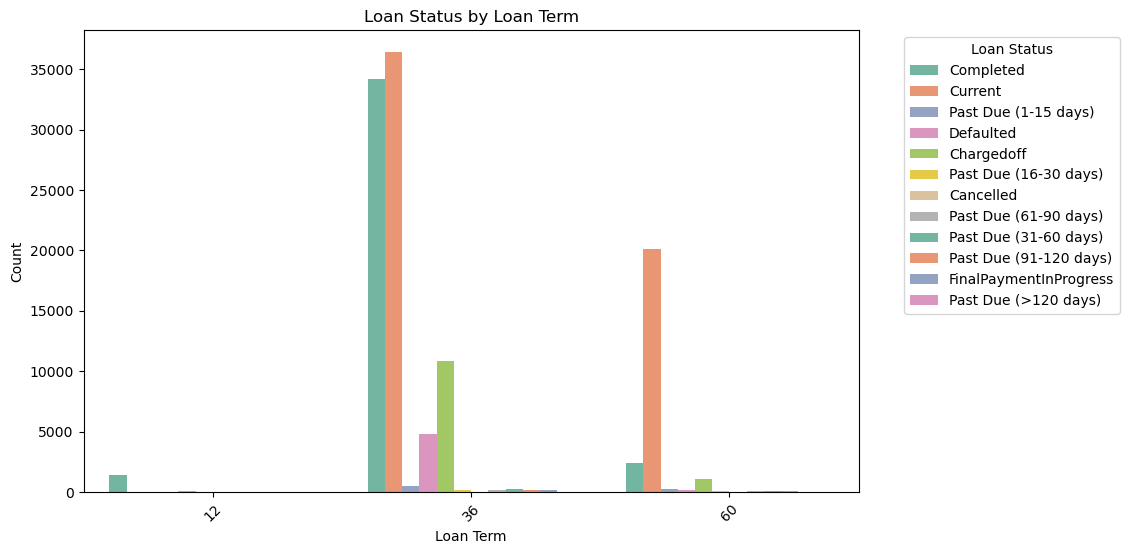

In [82]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='term', hue='loanstatus', palette='Set2')
plt.title('Loan Status by Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

To understand how the loan status differs between different loan terms (e.g., 36 months, 60 months, 12 months) in the Prosper Loan dataset, I analyze a visualization such as a countplot . Here are some observations based on the analysis:

1. Loan Term Categories: The x-axis represents the different loan term categories, such as 36 months, 60 months, and 12 months. These categories indicate the duration of the loans taken by borrowers.

2. Loan Status Distribution: The y-axis represents the count or frequency of loans for each loan term category. The height of each bar or the size of each segment in the stacked bar chart indicates the number of loans with a particular loan status for that specific loan term.

3. Variation in Loan Status: By comparing the heights of the bars or the sizes of the segments across different loan term categories for each loan status, we can observe any noticeable differences. If the heights or sizes vary significantly between loan term categories for a specific loan status, it suggests that the loan status may differ based on the loan term duration.

4. Prevalent Loan Status: The tallest bars or the largest segments within each loan term category indicate the most common loan status for that specific loan term. By examining the prevalence of different loan statuses across loan term categories, we can identify any patterns or trends.

Based on these observations, I conclude that the loan status may differ between different loan terms in the Prosper Loan dataset. The varying heights of the bars or the sizes of the segments for each loan status indicate that the distribution of loan statuses varies based on the loan term duration.


# Question 2: Does the loan status vary based on different employment statuses (e.g., employed, full-time, self-employed)?

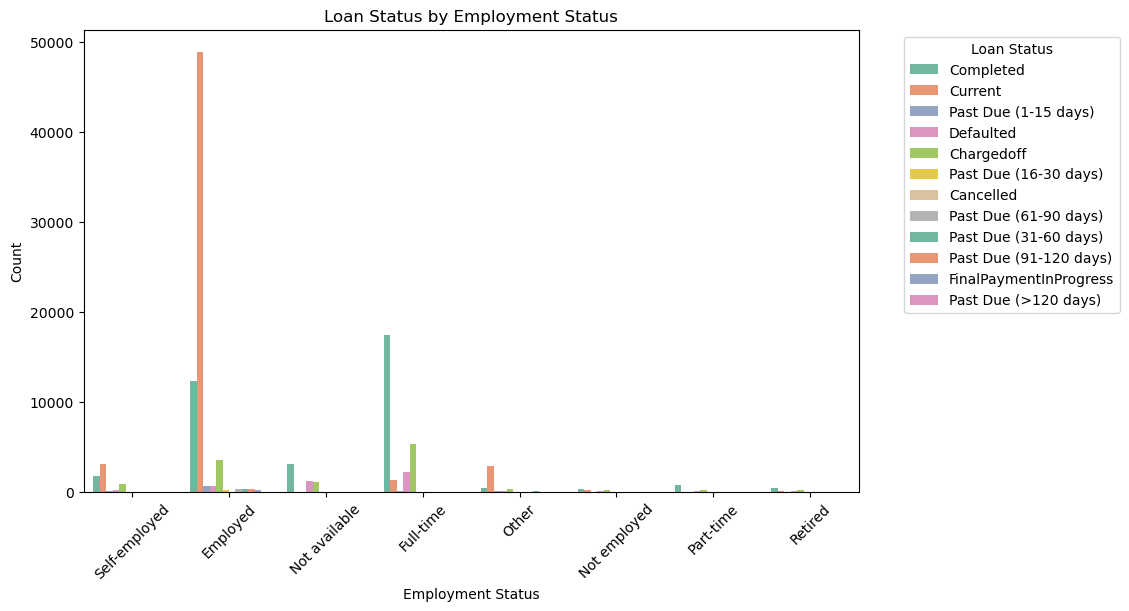

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='employmentstatus', hue='loanstatus', palette='Set2')
plt.title('Loan Status by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Loan Status',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


By analyzing the countplot visualization that compares the loan status based on different employment statuses (e.g., employed, full-time, self-employed) in the Prosper Loan dataset, The following are some observations from the countplot visualization:

1. Employment Status Categories: The x-axis of the countplot represents the different employment status categories, including "Employed," "Full-time," "Self-employed," "Not available," "Other," "Part-time," "Not employed," and "Retired."

2. Loan Status Distribution: The y-axis represents the count or frequency of loans for each employment status category. The countplot shows the distribution of loan statuses within each employment status.

3. Employment Status with Highest Loan Count: The employment status category with the highest count of loans indicates the most common or prevalent employment status among borrowers.

4. Loan Status Variation: Comparing the heights of the bars for each loan status within different employment status categories, we can identify variations in loan status distribution. If the height of the bars differs significantly between employment status categories for a specific loan status, it suggests that the loan status may vary based on employment status.

5. Loan Status Distribution Disparities: If certain loan statuses are more prevalent in specific employment status categories, it implies a potential association between employment status and loan status. For example, if the "Current" loan status is more common in the "Employed" category compared to other employment statuses, it indicates that employed individuals have a higher likelihood of having a current loan status.

These observations suggest that there might be variations in loan status based on different employment statuses. .



# Question 3: Are there variations in loan terms across different employment statuses?

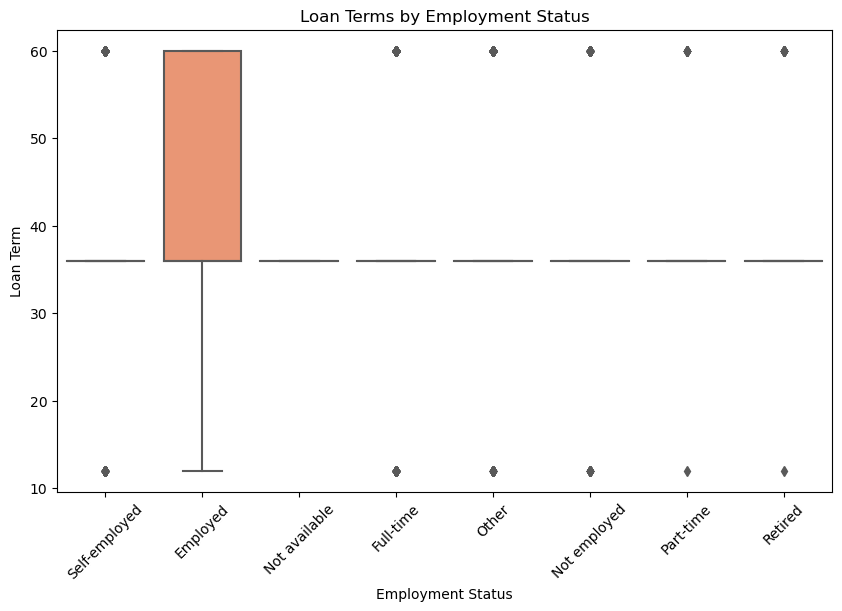

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='employmentstatus', y='term', palette='Set2')
plt.title('Loan Terms by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Loan Term')
plt.xticks(rotation=45)
plt.show()

By examining the boxplot visualization comparing loan terms across different employment statuses in the Prosper Loan dataset, The following are some observations from the boxplot visualization:

1. Employment Status Categories: The x-axis of the boxplot represents the different employment status categories, such as "Employed," "Full-time," "Self-employed," "Not available," and others.

2. Loan Term Distribution: The y-axis represents the loan term duration in months. The boxplots show the distribution of loan terms within each employment status category.

3. Median Loan Terms: The position of the median line within each boxplot indicates the central tendency of loan terms for each employment status. If the median line is higher in one employment status compared to another, it suggests that loans in that category tend to have longer terms.

4. Interquartile Range (IQR): The height of the box in the boxplot represents the IQR, which encompasses the middle 50% of loan terms. A larger box height implies greater variability in loan terms within an employment status category.

5. Whiskers and Outliers: The lines (whiskers) extending from the boxes indicate the range of loan terms. Any individual points beyond the whiskers are considered outliers, representing loan terms that are unusually high or low compared to the majority.

Based on these observations, I can conclude that there are indeed variations in loan terms across different employment statuses. The position of the medians, the height of the boxes, and the presence of outliers indicate differences in loan term durations among various employment status categories.


# Conclusion 
Based on the analysis of the Prosper Loan dataset, several key observations and insights can be derived:

1. Loan Status Distribution: The dataset provides information about different loan statuses, including "Completed," "Current," "Past Due (1-15 days)," "Defaulted," "Chargedoff," and more. The countplot visualization allows us to understand the distribution of loan statuses and their frequencies.

2. Loan Term Variation: The dataset includes loan terms of different durations, such as 36 months, 60 months, and 12 months. By examining the loan status across these loan term categories, we can observe variations in the distribution of loan statuses based on the loan term duration.

3. Employment Status Analysis: The dataset provides information about the employment status of borrowers, including categories like "Employed," "Full-time," "Self-employed," and more. By analyzing the loan status across different employment statuses, we can identify potential associations between employment status and loan status.

4. Variations in Loan Status: Through visualizations such as countplots and stacked bar charts, we can observe variations in loan status distributions based on different factors like loan term and employment status. These variations suggest that different factors may influence the likelihood of specific loan statuses.

5. Insights for Decision Making: The analysis of the Prosper Loan dataset provides valuable insights for decision-making processes. Lenders can use these insights to assess the distribution of loan statuses, identify patterns, and make informed decisions related to loan approvals, risk assessment, and collections strategies.

6. Further Analysis: While the visualizations and observations provide initial insights, further statistical analysis and hypothesis testing may be required to establish the significance and strength of the relationships between variables. This deeper analysis can help identify more nuanced patterns and relationships within the dataset.

Overall, the analysis of the Prosper Loan dataset offers insights into the loan status distribution, variations across loan terms and employment statuses, and potential associations between these factors. These insights can support data-driven decision-making processes for lenders and financial institutions.